In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
from main import ImageTextDetector

In [3]:
imageTextDetector = ImageTextDetector()

In [4]:
phrases = imageTextDetector.get_phrases_from_image()

Loading weights from checkpoint (../neural_networks/CRAFT/craft_ic15_20k.pth)
Test image: books_images/book.jpg
elapsed time : 16.194350957870483s
37
36
35
31
7
6
5
3
1


In [6]:
len(phrases)

2

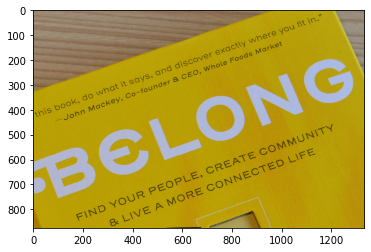

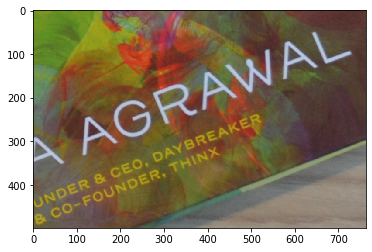

In [7]:
for phrase in phrases:
    plt.imshow(phrase)
    plt.show()